In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/delivery_time (1).csv")

In [4]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data['Delivery Time']=pd.to_numeric(data['Delivery Time'],errors = 'coerce')
data['Sorting Time']=pd.to_numeric(data['Sorting Time'],errors = 'coerce')


In [6]:
data.duplicated()
data=data.drop_duplicates()


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 504.0 bytes


In [8]:
data.shape

(21, 2)

In [9]:
Sorting= data.iloc[:,1]

In [10]:
Delivery= data.iloc[:,0]

In [11]:
from matplotlib import pyplot

{'whiskers': [<matplotlib.lines.Line2D at 0x7d9ccb9af1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d9ccb9af700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d9ccb9aef20>],
 'medians': [<matplotlib.lines.Line2D at 0x7d9ccb9afc40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d9ccb9afee0>],
 'means': []}

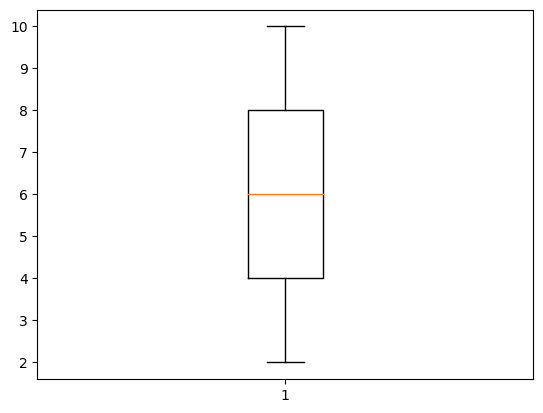

In [12]:
pyplot.boxplot(Sorting)

{'whiskers': [<matplotlib.lines.Line2D at 0x7d9cc99004f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d9cc9900a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d9cc9900250>],
 'medians': [<matplotlib.lines.Line2D at 0x7d9cc9900f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d9cc9900eb0>],
 'means': []}

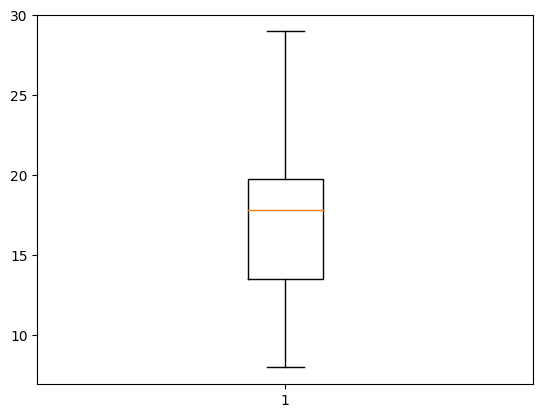

In [13]:
pyplot.boxplot(Delivery)

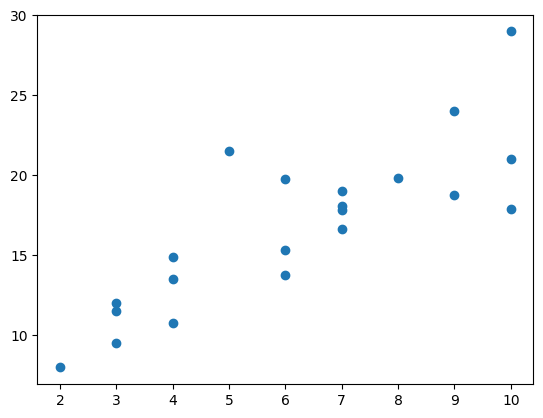

In [14]:
pyplot.scatter(Sorting,Delivery)

In [15]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [16]:
import statsmodels.formula.api as smf

In [17]:
model = smf.ols("Delivery~Sorting", data=data).fit()

In [18]:
import seaborn as sns

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

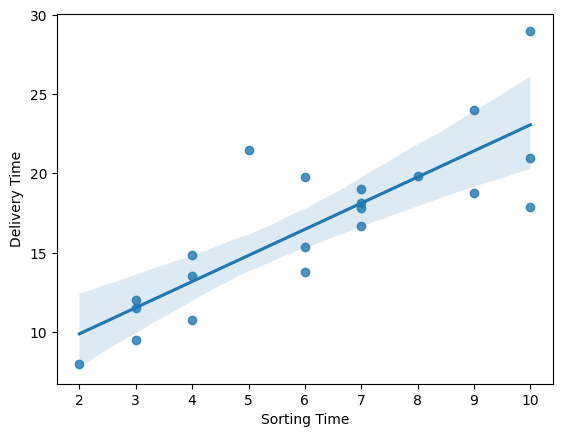

In [22]:
sns.regplot(x="Sorting Time", y="Delivery Time", data=data)

In [23]:
model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [24]:
#prediction

In [25]:
newdata = pd.Series([15,20])

In [26]:
predData=pd.DataFrame(newdata,columns=['Sorting'])

In [27]:
model.predict(predData)

0    31.318032
1    39.563132
dtype: float64

In [28]:
model.rsquared

0.6822714748417231

In [29]:
model.tvalues

Intercept    3.823349
Sorting      6.387447
dtype: float64

In [30]:
model.pvalues

Intercept    0.001147
Sorting      0.000004
dtype: float64

In [31]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [34]:

import pandas as pd
import numpy as np
import scipy as sp
import statsmodels.formula.api as smf

X = data['Sorting Time']
y = data['Delivery Time']

results = pd.DataFrame(columns=['Transformation', 'R-squared', 't-value', 'p-value'])




In [38]:
# Fit the models with different transformations
for transformation in ['Original', 'Log', 'Sqrt', 'Square']:
    if transformation == 'Original':
        X_transformed = X
    elif transformation == 'Log':
        X_transformed = np.log(X)
    elif transformation == 'Sqrt':
        X_transformed = np.sqrt(X)
    elif transformation == 'Square':
        X_transformed = X ** 2
    # Fit the model
    model = smf.ols(f"y ~ X_transformed", data=data).fit()

    # Store the results
    results = results.append({
        'Transformation': transformation,
        'R-squared': model.rsquared,
        't-value': model.tvalues[1],
        'p-value': model.pvalues[1]
    }, ignore_index=True)



<ipython-input-38-df789d9b0b61>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-38-df789d9b0b61>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-38-df789d9b0b61>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-38-df789d9b0b61>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


In [39]:

print(results)

  Transformation  R-squared   t-value   p-value
0       Original   0.682271  6.387447  0.000004
1            Log   0.695443  6.586789  0.000003
2           Sqrt   0.695806  6.592434  0.000003
3         Square   0.630287  5.691330  0.000017


In [43]:
results = pd.DataFrame(columns=['Transformation', 'R-squared', 't-value', 'p-value'])



In [44]:
transformations = {
    'Original': lambda x: x,
    'Log': np.log,
    'Sqrt': np.sqrt,
    'Square': lambda x: x**2
}

<ipython-input-47-14b01bf0b188>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-47-14b01bf0b188>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-47-14b01bf0b188>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-47-14b01bf0b188>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


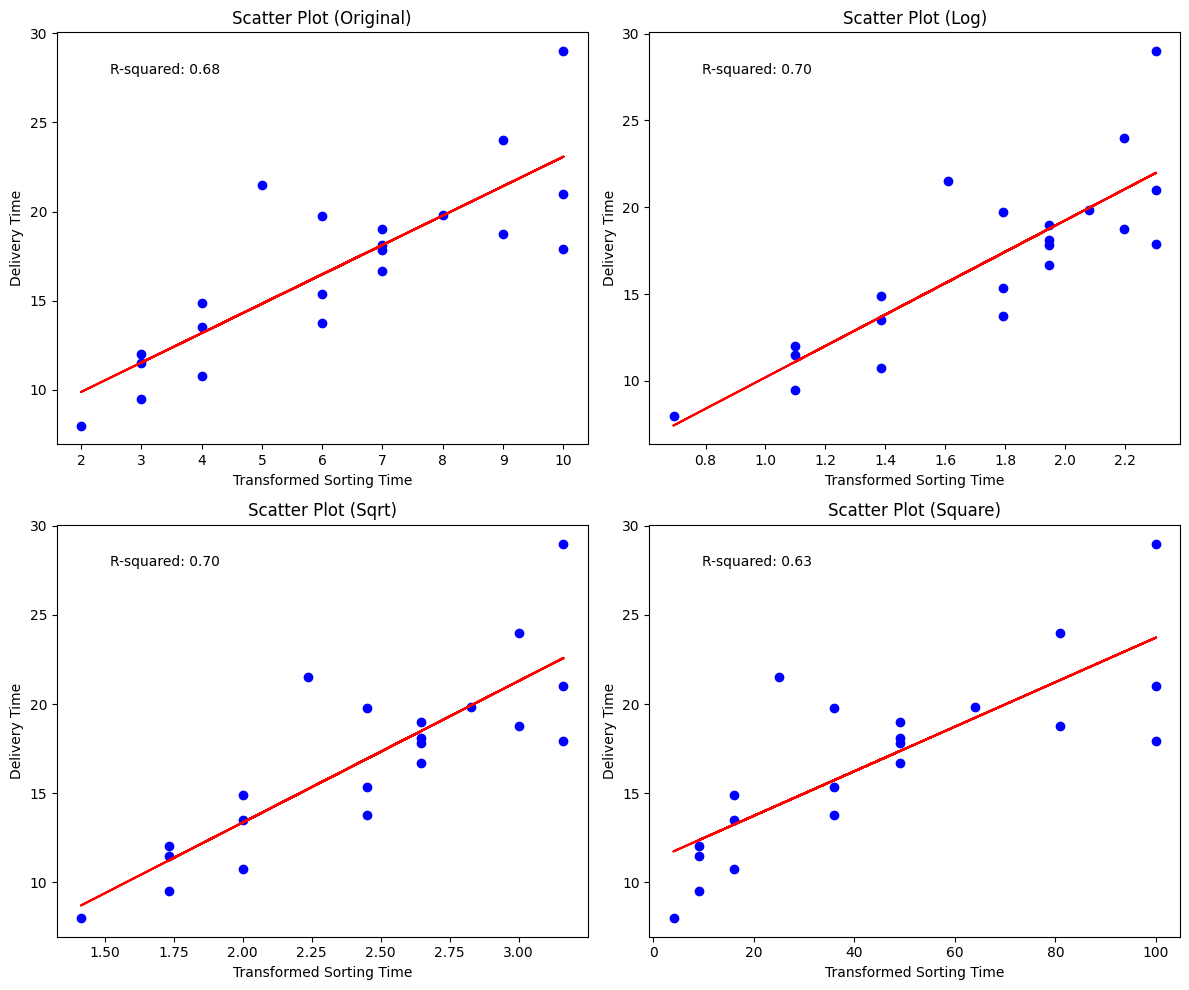

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
for (transformation, func), ax in zip(transformations.items(), axes.flatten()):
    X_transformed = func(X)
    model = smf.ols(f"y ~ X_transformed", data=data).fit()

    # Store the results
    results = results.append({
        'Transformation': transformation,
        'R-squared': model.rsquared,
        't-value': model.tvalues[1],
        'p-value': model.pvalues[1]
    }, ignore_index=True)

    # Scatter plot with regression line
    ax.scatter(X_transformed, y, color='blue')
    ax.plot(X_transformed, model.predict(), color='red')
    ax.set_title(f'Scatter Plot ({transformation})')
    ax.set_xlabel('Transformed Sorting Time')
    ax.set_ylabel('Delivery Time')
    ax.text(0.1, 0.9, f"R-squared: {model.rsquared:.2f}", transform=ax.transAxes)

plt.tight_layout()
plt.show()